In [1]:
import sys, os
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet")
import dense_unet

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'dense_unet_50ep_256_fG_wo_slice'
INPUT_SHAPE = (256, 256, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/history/" + FILE_NAME + '_history' ".json"

TRAIN_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'
TEST_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

2024-02-14 15:42:07.271258: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-14 15:42:07.979356: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 15:42:07.979740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 15:42:08.103538: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 15:42:08.344379: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,}

# Create augmentation
# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)

# Create train, test generator
train_generator = data_generator.FullSizedDataGenerator(
    TRAIN_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    is_test=False,
    slice_black=False,
    augmentation= train_preproc
)

test_generator = data_generator.FullSizedDataGenerator(
    TRAIN_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

# Create model
model = dense_unet.build_model(input_shape=INPUT_SHAPE)
model.summary()

2024-02-14 15:42:22.893929: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20763 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 48)         480       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 48)         192       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 48)         0         ['batch_normalization[0][0

In [3]:
train.model_train(model,
                  epoch = 50,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=True,
                  is_load_model=False)


Epoch 00001: WeightDecayScheduler setting learning rate to 9.999899747381279e-05.
Epoch 1/50


2024-02-14 15:42:57.911037: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-14 15:43:00.678711: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f63047c6810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-14 15:43:00.678754: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2024-02-14 15:43:00.701984: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1707925380.839627   31995 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1079/1080 [============================>.] - ETA: 0s - loss: 0.3013 - sensitivity: 0.6685 - specificity: 0.9750 - accuracy: 0.9541INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/1--0.3012-0.6685-0.9750-0.2717-0.6853-0.9790.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/1--0.3012-0.6685-0.9750-0.2717-0.6853-0.9790.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/1--0.3012-0.6685-0.9750-0.2717-0.6853-0.9790.pb
1080/1080 [==============================] - 364s 325ms/step - loss: 0.3012 - sensitivity: 0.6685 - specificity: 0.9750 - accuracy: 0.9541 - val_loss: 0.2717 - val_sensitivity: 0.6853 - val_specificity: 0.9790 - val_accuracy: 0.9600

Epoch 00002: WeightDecayScheduler setting learning rate to 9.99980006775877e-05.
Epoch 2/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2462 - sensitivity: 0.7254 - specificity: 0.9798 - accuracy: 0.9626INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/2--0.2462-0.7254-0.9798-0.2898-0.5910-0.9888.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/2--0.2462-0.7254-0.9798-0.2898-0.5910-0.9888.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/2--0.2462-0.7254-0.9798-0.2898-0.5910-0.9888.pb
1080/1080 [==============================] - 345s 319ms/step - loss: 0.2462 - sensitivity: 0.7254 - specificity: 0.9798 - accuracy: 0.9626 - val_loss: 0.2898 - val_sensitivity: 0.5910 - val_specificity: 0.9888 - val_accuracy: 0.9623

Epoch 00003: WeightDecayScheduler setting learning rate to 9.999700388136262e-05.
Epoch 3/50
1078/1080 [============================>.] - ETA: 0s - loss: 0.2330 - sensitivity: 0.7381 - specificity: 0.9810 - accuracy: 0.9647INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/3--0.2331-0.7380-0.9810-0.2511-0.6719-0.9850.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/3--0.2331-0.7380-0.9810-0.2511-0.6719-0.9850.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/3--0.2331-0.7380-0.9810-0.2511-0.6719-0.9850.pb
1080/1080 [==============================] - 345s 320ms/step - loss: 0.2331 - sensitivity: 0.7380 - specificity: 0.9810 - accuracy: 0.9647 - val_loss: 0.2511 - val_sensitivity: 0.6719 - val_specificity: 0.9850 - val_accuracy: 0.9645

Epoch 00004: WeightDecayScheduler setting learning rate to 9.999600708513754e-05.
Epoch 4/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2260 - sensitivity: 0.7451 - specificity: 0.9815 - accuracy: 0.9657INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/4--0.2260-0.7451-0.9815-0.2410-0.7203-0.9808.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/4--0.2260-0.7451-0.9815-0.2410-0.7203-0.9808.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/4--0.2260-0.7451-0.9815-0.2410-0.7203-0.9808.pb
1080/1080 [==============================] - 343s 317ms/step - loss: 0.2260 - sensitivity: 0.7451 - specificity: 0.9815 - accuracy: 0.9657 - val_loss: 0.2410 - val_sensitivity: 0.7203 - val_specificity: 0.9808 - val_accuracy: 0.9641

Epoch 00005: WeightDecayScheduler setting learning rate to 9.999501028891246e-05.
Epoch 5/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2207 - sensitivity: 0.7503 - specificity: 0.9819 - accuracy: 0.9665INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/5--0.2207-0.7503-0.9819-0.2424-0.6921-0.9842.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/5--0.2207-0.7503-0.9819-0.2424-0.6921-0.9842.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/5--0.2207-0.7503-0.9819-0.2424-0.6921-0.9842.pb
1080/1080 [==============================] - 342s 317ms/step - loss: 0.2207 - sensitivity: 0.7503 - specificity: 0.9819 - accuracy: 0.9665 - val_loss: 0.2424 - val_sensitivity: 0.6921 - val_specificity: 0.9842 - val_accuracy: 0.9651

Epoch 00006: WeightDecayScheduler setting learning rate to 9.999401349268737e-05.
Epoch 6/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2161 - sensitivity: 0.7536 - specificity: 0.9823 - accuracy: 0.9671INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/6--0.2161-0.7536-0.9823-0.2499-0.6672-0.9859.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/6--0.2161-0.7536-0.9823-0.2499-0.6672-0.9859.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/6--0.2161-0.7536-0.9823-0.2499-0.6672-0.9859.pb
1080/1080 [==============================] - 344s 319ms/step - loss: 0.2161 - sensitivity: 0.7536 - specificity: 0.9823 - accuracy: 0.9671 - val_loss: 0.2499 - val_sensitivity: 0.6672 - val_specificity: 0.9859 - val_accuracy: 0.9651

Epoch 00007: WeightDecayScheduler setting learning rate to 9.999301669646229e-05.
Epoch 7/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2117 - sensitivity: 0.7570 - specificity: 0.9825 - accuracy: 0.9676INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/7--0.2117-0.7570-0.9825-0.2350-0.7618-0.9766.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/7--0.2117-0.7570-0.9825-0.2350-0.7618-0.9766.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/7--0.2117-0.7570-0.9825-0.2350-0.7618-0.9766.pb
1080/1080 [==============================] - 343s 318ms/step - loss: 0.2117 - sensitivity: 0.7570 - specificity: 0.9825 - accuracy: 0.9676 - val_loss: 0.2350 - val_sensitivity: 0.7618 - val_specificity: 0.9766 - val_accuracy: 0.9631

Epoch 00008: WeightDecayScheduler setting learning rate to 9.999201990023722e-05.
Epoch 8/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2092 - sensitivity: 0.7586 - specificity: 0.9826 - accuracy: 0.9679INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/8--0.2092-0.7586-0.9826-0.2498-0.6569-0.9873.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/8--0.2092-0.7586-0.9826-0.2498-0.6569-0.9873.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/8--0.2092-0.7586-0.9826-0.2498-0.6569-0.9873.pb
1080/1080 [==============================] - 341s 316ms/step - loss: 0.2092 - sensitivity: 0.7586 - specificity: 0.9826 - accuracy: 0.9679 - val_loss: 0.2498 - val_sensitivity: 0.6569 - val_specificity: 0.9873 - val_accuracy: 0.9656

Epoch 00009: WeightDecayScheduler setting learning rate to 9.999102310401214e-05.
Epoch 9/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2063 - sensitivity: 0.7606 - specificity: 0.9829 - accuracy: 0.9683INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/9--0.2063-0.7606-0.9829-0.2356-0.7105-0.9832.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/9--0.2063-0.7606-0.9829-0.2356-0.7105-0.9832.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/9--0.2063-0.7606-0.9829-0.2356-0.7105-0.9832.pb
1080/1080 [==============================] - 342s 317ms/step - loss: 0.2063 - sensitivity: 0.7606 - specificity: 0.9829 - accuracy: 0.9683 - val_loss: 0.2356 - val_sensitivity: 0.7105 - val_specificity: 0.9832 - val_accuracy: 0.9656

Epoch 00010: WeightDecayScheduler setting learning rate to 9.999002630778705e-05.
Epoch 10/50
1080/1080 [==============================] - ETA: 0s - loss: 0.2028 - sensitivity: 0.7633 - specificity: 0.9832 - accuracy: 0.9687INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/10--0.2028-0.7633-0.9832-0.2366-0.7021-0.9838.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/10--0.2028-0.7633-0.9832-0.2366-0.7021-0.9838.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/10--0.2028-0.7633-0.9832-0.2366-0.7021-0.9838.pb
1080/1080 [==============================] - 341s 316ms/step - loss: 0.2028 - sensitivity: 0.7633 - specificity: 0.9832 - accuracy: 0.9687 - val_loss: 0.2366 - val_sensitivity: 0.7021 - val_specificity: 0.9838 - val_accuracy: 0.9655

Epoch 00011: WeightDecayScheduler setting learning rate to 9.998902951156197e-05.
Epoch 11/50
1079/1080 [============================>.] - ETA: 0s - loss: 0.2019 - sensitivity: 0.7638 - specificity: 0.9833 - accuracy: 0.9689INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/11--0.2018-0.7639-0.9833-0.2333-0.7225-0.9821.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/11--0.2018-0.7639-0.9833-0.2333-0.7225-0.9821.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/11--0.2018-0.7639-0.9833-0.2333-0.7225-0.9821.pb
1080/1080 [==============================] - 344s 319ms/step - loss: 0.2018 - sensitivity: 0.7639 - specificity: 0.9833 - accuracy: 0.9689 - val_loss: 0.2333 - val_sensitivity: 0.7225 - val_specificity: 0.9821 - val_accuracy: 0.9655

Epoch 00012: WeightDecayScheduler setting learning rate to 9.998803271533689e-05.
Epoch 12/50
1079/1080 [============================>.] - ETA: 0s - loss: 0.2003 - sensitivity: 0.7645 - specificity: 0.9835 - accuracy: 0.9691INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/12--0.2003-0.7646-0.9835-0.2318-0.7684-0.9764.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/12--0.2003-0.7646-0.9835-0.2318-0.7684-0.9764.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/12--0.2003-0.7646-0.9835-0.2318-0.7684-0.9764.pb
1080/1080 [==============================] - 347s 321ms/step - loss: 0.2003 - sensitivity: 0.7646 - specificity: 0.9835 - accuracy: 0.9691 - val_loss: 0.2318 - val_sensitivity: 0.7684 - val_specificity: 0.9764 - val_accuracy: 0.9634

Epoch 00013: WeightDecayScheduler setting learning rate to 9.99870359191118e-05.
Epoch 13/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1977 - sensitivity: 0.7665 - specificity: 0.9837 - accuracy: 0.9695INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/13--0.1977-0.7665-0.9837-0.2322-0.7443-0.9795.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/13--0.1977-0.7665-0.9837-0.2322-0.7443-0.9795.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/13--0.1977-0.7665-0.9837-0.2322-0.7443-0.9795.pb
1080/1080 [==============================] - 340s 315ms/step - loss: 0.1977 - sensitivity: 0.7665 - specificity: 0.9837 - accuracy: 0.9695 - val_loss: 0.2322 - val_sensitivity: 0.7443 - val_specificity: 0.9795 - val_accuracy: 0.9645

Epoch 00014: WeightDecayScheduler setting learning rate to 9.998603912288672e-05.
Epoch 14/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1964 - sensitivity: 0.7674 - specificity: 0.9837 - accuracy: 0.9696INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/14--0.1964-0.7674-0.9837-0.2314-0.7242-0.9823.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/14--0.1964-0.7674-0.9837-0.2314-0.7242-0.9823.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/14--0.1964-0.7674-0.9837-0.2314-0.7242-0.9823.pb
1080/1080 [==============================] - 345s 320ms/step - loss: 0.1964 - sensitivity: 0.7674 - specificity: 0.9837 - accuracy: 0.9696 - val_loss: 0.2314 - val_sensitivity: 0.7242 - val_specificity: 0.9823 - val_accuracy: 0.9657

Epoch 00015: WeightDecayScheduler setting learning rate to 9.998504232666165e-05.
Epoch 15/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1947 - sensitivity: 0.7689 - specificity: 0.9839 - accuracy: 0.9699INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/15--0.1947-0.7689-0.9839-0.2284-0.7342-0.9817.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/15--0.1947-0.7689-0.9839-0.2284-0.7342-0.9817.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/15--0.1947-0.7689-0.9839-0.2284-0.7342-0.9817.pb
1080/1080 [==============================] - 343s 317ms/step - loss: 0.1947 - sensitivity: 0.7689 - specificity: 0.9839 - accuracy: 0.9699 - val_loss: 0.2284 - val_sensitivity: 0.7342 - val_specificity: 0.9817 - val_accuracy: 0.9658

Epoch 00016: WeightDecayScheduler setting learning rate to 9.998404553043657e-05.
Epoch 16/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1934 - sensitivity: 0.7704 - specificity: 0.9840 - accuracy: 0.9700INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/16--0.1934-0.7704-0.9840-0.2371-0.7081-0.9833.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/16--0.1934-0.7704-0.9840-0.2371-0.7081-0.9833.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/16--0.1934-0.7704-0.9840-0.2371-0.7081-0.9833.pb
1080/1080 [==============================] - 345s 319ms/step - loss: 0.1934 - sensitivity: 0.7704 - specificity: 0.9840 - accuracy: 0.9700 - val_loss: 0.2371 - val_sensitivity: 0.7081 - val_specificity: 0.9833 - val_accuracy: 0.9656

Epoch 00017: WeightDecayScheduler setting learning rate to 9.998304873421149e-05.
Epoch 17/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1927 - sensitivity: 0.7715 - specificity: 0.9840 - accuracy: 0.9701INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/17--0.1927-0.7715-0.9840-0.2338-0.7069-0.9840.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/17--0.1927-0.7715-0.9840-0.2338-0.7069-0.9840.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/17--0.1927-0.7715-0.9840-0.2338-0.7069-0.9840.pb
1080/1080 [==============================] - 341s 315ms/step - loss: 0.1927 - sensitivity: 0.7715 - specificity: 0.9840 - accuracy: 0.9701 - val_loss: 0.2338 - val_sensitivity: 0.7069 - val_specificity: 0.9840 - val_accuracy: 0.9661

Epoch 00018: WeightDecayScheduler setting learning rate to 9.99820519379864e-05.
Epoch 18/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1919 - sensitivity: 0.7715 - specificity: 0.9842 - accuracy: 0.9703INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/18--0.1919-0.7715-0.9842-0.2303-0.7085-0.9845.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/18--0.1919-0.7715-0.9842-0.2303-0.7085-0.9845.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/18--0.1919-0.7715-0.9842-0.2303-0.7085-0.9845.pb
1080/1080 [==============================] - 339s 314ms/step - loss: 0.1919 - sensitivity: 0.7715 - specificity: 0.9842 - accuracy: 0.9703 - val_loss: 0.2303 - val_sensitivity: 0.7085 - val_specificity: 0.9845 - val_accuracy: 0.9666

Epoch 00019: WeightDecayScheduler setting learning rate to 9.998105514176132e-05.
Epoch 19/50
1079/1080 [============================>.] - ETA: 0s - loss: 0.1903 - sensitivity: 0.7734 - specificity: 0.9842 - accuracy: 0.9705INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/19--0.1903-0.7735-0.9842-0.2296-0.7461-0.9800.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/19--0.1903-0.7735-0.9842-0.2296-0.7461-0.9800.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/19--0.1903-0.7735-0.9842-0.2296-0.7461-0.9800.pb
1080/1080 [==============================] - 338s 313ms/step - loss: 0.1903 - sensitivity: 0.7735 - specificity: 0.9842 - accuracy: 0.9705 - val_loss: 0.2296 - val_sensitivity: 0.7461 - val_specificity: 0.9800 - val_accuracy: 0.9651

Epoch 00020: WeightDecayScheduler setting learning rate to 9.998005834553624e-05.
Epoch 20/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1894 - sensitivity: 0.7739 - specificity: 0.9843 - accuracy: 0.9706INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/20--0.1894-0.7739-0.9843-0.2306-0.7270-0.9823.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/20--0.1894-0.7739-0.9843-0.2306-0.7270-0.9823.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/20--0.1894-0.7739-0.9843-0.2306-0.7270-0.9823.pb
1080/1080 [==============================] - 347s 322ms/step - loss: 0.1894 - sensitivity: 0.7739 - specificity: 0.9843 - accuracy: 0.9706 - val_loss: 0.2306 - val_sensitivity: 0.7270 - val_specificity: 0.9823 - val_accuracy: 0.9660

Epoch 00021: WeightDecayScheduler setting learning rate to 9.997906154931117e-05.
Epoch 21/50
1079/1080 [============================>.] - ETA: 0s - loss: 0.1879 - sensitivity: 0.7757 - specificity: 0.9844 - accuracy: 0.9708INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/21--0.1880-0.7757-0.9844-0.2354-0.6886-0.9858.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/21--0.1880-0.7757-0.9844-0.2354-0.6886-0.9858.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/21--0.1880-0.7757-0.9844-0.2354-0.6886-0.9858.pb
1080/1080 [==============================] - 343s 317ms/step - loss: 0.1880 - sensitivity: 0.7757 - specificity: 0.9844 - accuracy: 0.9708 - val_loss: 0.2354 - val_sensitivity: 0.6886 - val_specificity: 0.9858 - val_accuracy: 0.9665

Epoch 00022: WeightDecayScheduler setting learning rate to 9.997806475308608e-05.
Epoch 22/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1868 - sensitivity: 0.7771 - specificity: 0.9844 - accuracy: 0.9709INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/22--0.1868-0.7771-0.9844-0.2293-0.7090-0.9846.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/22--0.1868-0.7771-0.9844-0.2293-0.7090-0.9846.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/22--0.1868-0.7771-0.9844-0.2293-0.7090-0.9846.pb
1080/1080 [==============================] - 340s 315ms/step - loss: 0.1868 - sensitivity: 0.7771 - specificity: 0.9844 - accuracy: 0.9709 - val_loss: 0.2293 - val_sensitivity: 0.7090 - val_specificity: 0.9846 - val_accuracy: 0.9668

Epoch 00023: WeightDecayScheduler setting learning rate to 9.9977067956861e-05.
Epoch 23/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1862 - sensitivity: 0.7778 - specificity: 0.9844 - accuracy: 0.9710INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/23--0.1862-0.7778-0.9844-0.2263-0.7285-0.9829.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/23--0.1862-0.7778-0.9844-0.2263-0.7285-0.9829.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/23--0.1862-0.7778-0.9844-0.2263-0.7285-0.9829.pb
1080/1080 [==============================] - 345s 319ms/step - loss: 0.1862 - sensitivity: 0.7778 - specificity: 0.9844 - accuracy: 0.9710 - val_loss: 0.2263 - val_sensitivity: 0.7285 - val_specificity: 0.9829 - val_accuracy: 0.9665

Epoch 00024: WeightDecayScheduler setting learning rate to 9.997607116063592e-05.
Epoch 24/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1855 - sensitivity: 0.7786 - specificity: 0.9845 - accuracy: 0.9711INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/24--0.1855-0.7786-0.9845-0.2218-0.7586-0.9800.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/24--0.1855-0.7786-0.9845-0.2218-0.7586-0.9800.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/24--0.1855-0.7786-0.9845-0.2218-0.7586-0.9800.pb
1080/1080 [==============================] - 341s 316ms/step - loss: 0.1855 - sensitivity: 0.7786 - specificity: 0.9845 - accuracy: 0.9711 - val_loss: 0.2218 - val_sensitivity: 0.7586 - val_specificity: 0.9800 - val_accuracy: 0.9659

Epoch 00025: WeightDecayScheduler setting learning rate to 9.997507436441083e-05.
Epoch 25/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1840 - sensitivity: 0.7800 - specificity: 0.9846 - accuracy: 0.9713INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/25--0.1840-0.7800-0.9846-0.2251-0.7355-0.9823.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/25--0.1840-0.7800-0.9846-0.2251-0.7355-0.9823.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/25--0.1840-0.7800-0.9846-0.2251-0.7355-0.9823.pb
1080/1080 [==============================] - 343s 318ms/step - loss: 0.1840 - sensitivity: 0.7800 - specificity: 0.9846 - accuracy: 0.9713 - val_loss: 0.2251 - val_sensitivity: 0.7355 - val_specificity: 0.9823 - val_accuracy: 0.9664

Epoch 00026: WeightDecayScheduler setting learning rate to 9.997407756818575e-05.
Epoch 26/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1835 - sensitivity: 0.7809 - specificity: 0.9846 - accuracy: 0.9714INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/26--0.1835-0.7809-0.9846-0.2279-0.7073-0.9850.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/26--0.1835-0.7809-0.9846-0.2279-0.7073-0.9850.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/26--0.1835-0.7809-0.9846-0.2279-0.7073-0.9850.pb
1080/1080 [==============================] - 340s 315ms/step - loss: 0.1835 - sensitivity: 0.7809 - specificity: 0.9846 - accuracy: 0.9714 - val_loss: 0.2279 - val_sensitivity: 0.7073 - val_specificity: 0.9850 - val_accuracy: 0.9670

Epoch 00027: WeightDecayScheduler setting learning rate to 9.997308077196067e-05.
Epoch 27/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1827 - sensitivity: 0.7809 - specificity: 0.9848 - accuracy: 0.9715INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/27--0.1827-0.7809-0.9848-0.2266-0.7296-0.9826.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/27--0.1827-0.7809-0.9848-0.2266-0.7296-0.9826.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/27--0.1827-0.7809-0.9848-0.2266-0.7296-0.9826.pb
1080/1080 [==============================] - 339s 314ms/step - loss: 0.1827 - sensitivity: 0.7809 - specificity: 0.9848 - accuracy: 0.9715 - val_loss: 0.2266 - val_sensitivity: 0.7296 - val_specificity: 0.9826 - val_accuracy: 0.9663

Epoch 00028: WeightDecayScheduler setting learning rate to 9.99720839757356e-05.
Epoch 28/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1823 - sensitivity: 0.7818 - specificity: 0.9847 - accuracy: 0.9716INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/28--0.1823-0.7818-0.9847-0.2249-0.7311-0.9827.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/28--0.1823-0.7818-0.9847-0.2249-0.7311-0.9827.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/28--0.1823-0.7818-0.9847-0.2249-0.7311-0.9827.pb
1080/1080 [==============================] - 341s 316ms/step - loss: 0.1823 - sensitivity: 0.7818 - specificity: 0.9847 - accuracy: 0.9716 - val_loss: 0.2249 - val_sensitivity: 0.7311 - val_specificity: 0.9827 - val_accuracy: 0.9665

Epoch 00029: WeightDecayScheduler setting learning rate to 9.997108717951051e-05.
Epoch 29/50
1079/1080 [============================>.] - ETA: 0s - loss: 0.1808 - sensitivity: 0.7837 - specificity: 0.9848 - accuracy: 0.9717INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/29--0.1808-0.7837-0.9848-0.2220-0.7517-0.9808.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/29--0.1808-0.7837-0.9848-0.2220-0.7517-0.9808.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/29--0.1808-0.7837-0.9848-0.2220-0.7517-0.9808.pb
1080/1080 [==============================] - 343s 318ms/step - loss: 0.1808 - sensitivity: 0.7837 - specificity: 0.9848 - accuracy: 0.9717 - val_loss: 0.2220 - val_sensitivity: 0.7517 - val_specificity: 0.9808 - val_accuracy: 0.9661

Epoch 00030: WeightDecayScheduler setting learning rate to 9.997009038328543e-05.
Epoch 30/50
1079/1080 [============================>.] - ETA: 0s - loss: 0.1805 - sensitivity: 0.7846 - specificity: 0.9848 - accuracy: 0.9717INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/30--0.1805-0.7846-0.9848-0.2246-0.7210-0.9842.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/30--0.1805-0.7846-0.9848-0.2246-0.7210-0.9842.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/30--0.1805-0.7846-0.9848-0.2246-0.7210-0.9842.pb
1080/1080 [==============================] - 347s 321ms/step - loss: 0.1805 - sensitivity: 0.7846 - specificity: 0.9848 - accuracy: 0.9717 - val_loss: 0.2246 - val_sensitivity: 0.7210 - val_specificity: 0.9842 - val_accuracy: 0.9671

Epoch 00031: WeightDecayScheduler setting learning rate to 9.996909358706035e-05.
Epoch 31/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1798 - sensitivity: 0.7850 - specificity: 0.9849 - accuracy: 0.9718INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/31--0.1798-0.7850-0.9849-0.2225-0.7498-0.9811.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/31--0.1798-0.7850-0.9849-0.2225-0.7498-0.9811.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/31--0.1798-0.7850-0.9849-0.2225-0.7498-0.9811.pb
1080/1080 [==============================] - 340s 315ms/step - loss: 0.1798 - sensitivity: 0.7850 - specificity: 0.9849 - accuracy: 0.9718 - val_loss: 0.2225 - val_sensitivity: 0.7498 - val_specificity: 0.9811 - val_accuracy: 0.9663

Epoch 00032: WeightDecayScheduler setting learning rate to 9.996809679083526e-05.
Epoch 32/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1790 - sensitivity: 0.7859 - specificity: 0.9849 - accuracy: 0.9720INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/32--0.1790-0.7859-0.9849-0.2214-0.7641-0.9795.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/32--0.1790-0.7859-0.9849-0.2214-0.7641-0.9795.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/32--0.1790-0.7859-0.9849-0.2214-0.7641-0.9795.pb
1080/1080 [==============================] - 340s 315ms/step - loss: 0.1790 - sensitivity: 0.7859 - specificity: 0.9849 - accuracy: 0.9720 - val_loss: 0.2214 - val_sensitivity: 0.7641 - val_specificity: 0.9795 - val_accuracy: 0.9658

Epoch 00033: WeightDecayScheduler setting learning rate to 9.996709999461018e-05.
Epoch 33/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1779 - sensitivity: 0.7875 - specificity: 0.9850 - accuracy: 0.9721INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/33--0.1779-0.7875-0.9850-0.2250-0.7255-0.9835.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/33--0.1779-0.7875-0.9850-0.2250-0.7255-0.9835.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/33--0.1779-0.7875-0.9850-0.2250-0.7255-0.9835.pb
1080/1080 [==============================] - 341s 316ms/step - loss: 0.1779 - sensitivity: 0.7875 - specificity: 0.9850 - accuracy: 0.9721 - val_loss: 0.2250 - val_sensitivity: 0.7255 - val_specificity: 0.9835 - val_accuracy: 0.9668

Epoch 00034: WeightDecayScheduler setting learning rate to 9.99661031983851e-05.
Epoch 34/50
1079/1080 [============================>.] - ETA: 0s - loss: 0.1773 - sensitivity: 0.7878 - specificity: 0.9850 - accuracy: 0.9721INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/34--0.1773-0.7878-0.9850-0.2290-0.7182-0.9835.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/34--0.1773-0.7878-0.9850-0.2290-0.7182-0.9835.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/34--0.1773-0.7878-0.9850-0.2290-0.7182-0.9835.pb
1080/1080 [==============================] - 343s 318ms/step - loss: 0.1773 - sensitivity: 0.7878 - specificity: 0.9850 - accuracy: 0.9721 - val_loss: 0.2290 - val_sensitivity: 0.7182 - val_specificity: 0.9835 - val_accuracy: 0.9664

Epoch 00035: WeightDecayScheduler setting learning rate to 9.996510640216003e-05.
Epoch 35/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1767 - sensitivity: 0.7885 - specificity: 0.9851 - accuracy: 0.9723INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/35--0.1767-0.7885-0.9851-0.2259-0.7236-0.9835.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/35--0.1767-0.7885-0.9851-0.2259-0.7236-0.9835.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/35--0.1767-0.7885-0.9851-0.2259-0.7236-0.9835.pb
1080/1080 [==============================] - 343s 317ms/step - loss: 0.1767 - sensitivity: 0.7885 - specificity: 0.9851 - accuracy: 0.9723 - val_loss: 0.2259 - val_sensitivity: 0.7236 - val_specificity: 0.9835 - val_accuracy: 0.9667

Epoch 00036: WeightDecayScheduler setting learning rate to 9.996410960593494e-05.
Epoch 36/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1762 - sensitivity: 0.7891 - specificity: 0.9851 - accuracy: 0.9723INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/36--0.1762-0.7891-0.9851-0.2257-0.7253-0.9835.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/36--0.1762-0.7891-0.9851-0.2257-0.7253-0.9835.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/36--0.1762-0.7891-0.9851-0.2257-0.7253-0.9835.pb
1080/1080 [==============================] - 343s 318ms/step - loss: 0.1762 - sensitivity: 0.7891 - specificity: 0.9851 - accuracy: 0.9723 - val_loss: 0.2257 - val_sensitivity: 0.7253 - val_specificity: 0.9835 - val_accuracy: 0.9668

Epoch 00037: WeightDecayScheduler setting learning rate to 9.996311280970986e-05.
Epoch 37/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1751 - sensitivity: 0.7909 - specificity: 0.9852 - accuracy: 0.9725INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/37--0.1751-0.7909-0.9852-0.2233-0.7295-0.9833.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/37--0.1751-0.7909-0.9852-0.2233-0.7295-0.9833.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/37--0.1751-0.7909-0.9852-0.2233-0.7295-0.9833.pb
1080/1080 [==============================] - 339s 314ms/step - loss: 0.1751 - sensitivity: 0.7909 - specificity: 0.9852 - accuracy: 0.9725 - val_loss: 0.2233 - val_sensitivity: 0.7295 - val_specificity: 0.9833 - val_accuracy: 0.9669

Epoch 00038: WeightDecayScheduler setting learning rate to 9.996211601348478e-05.
Epoch 38/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1748 - sensitivity: 0.7911 - specificity: 0.9852 - accuracy: 0.9726INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/38--0.1748-0.7911-0.9852-0.2241-0.7244-0.9838.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/38--0.1748-0.7911-0.9852-0.2241-0.7244-0.9838.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/38--0.1748-0.7911-0.9852-0.2241-0.7244-0.9838.pb
1080/1080 [==============================] - 336s 312ms/step - loss: 0.1748 - sensitivity: 0.7911 - specificity: 0.9852 - accuracy: 0.9726 - val_loss: 0.2241 - val_sensitivity: 0.7244 - val_specificity: 0.9838 - val_accuracy: 0.9670

Epoch 00039: WeightDecayScheduler setting learning rate to 9.99611192172597e-05.
Epoch 39/50
1078/1080 [============================>.] - ETA: 0s - loss: 0.1743 - sensitivity: 0.7916 - specificity: 0.9853 - accuracy: 0.9727INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/39--0.1743-0.7917-0.9853-0.2323-0.7067-0.9844.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/39--0.1743-0.7917-0.9853-0.2323-0.7067-0.9844.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/39--0.1743-0.7917-0.9853-0.2323-0.7067-0.9844.pb
1080/1080 [==============================] - 339s 314ms/step - loss: 0.1743 - sensitivity: 0.7917 - specificity: 0.9853 - accuracy: 0.9726 - val_loss: 0.2323 - val_sensitivity: 0.7067 - val_specificity: 0.9844 - val_accuracy: 0.9665

Epoch 00040: WeightDecayScheduler setting learning rate to 9.996012242103461e-05.
Epoch 40/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1734 - sensitivity: 0.7925 - specificity: 0.9853 - accuracy: 0.9727INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/40--0.1734-0.7925-0.9853-0.2245-0.7215-0.9842.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/40--0.1734-0.7925-0.9853-0.2245-0.7215-0.9842.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/40--0.1734-0.7925-0.9853-0.2245-0.7215-0.9842.pb
1080/1080 [==============================] - 339s 314ms/step - loss: 0.1734 - sensitivity: 0.7925 - specificity: 0.9853 - accuracy: 0.9727 - val_loss: 0.2245 - val_sensitivity: 0.7215 - val_specificity: 0.9842 - val_accuracy: 0.9672

Epoch 00041: WeightDecayScheduler setting learning rate to 9.995912562480953e-05.
Epoch 41/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1728 - sensitivity: 0.7934 - specificity: 0.9854 - accuracy: 0.9729INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/41--0.1728-0.7934-0.9854-0.2269-0.7101-0.9849.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/41--0.1728-0.7934-0.9854-0.2269-0.7101-0.9849.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/41--0.1728-0.7934-0.9854-0.2269-0.7101-0.9849.pb
1080/1080 [==============================] - 335s 310ms/step - loss: 0.1728 - sensitivity: 0.7934 - specificity: 0.9854 - accuracy: 0.9729 - val_loss: 0.2269 - val_sensitivity: 0.7101 - val_specificity: 0.9849 - val_accuracy: 0.9671

Epoch 00042: WeightDecayScheduler setting learning rate to 9.995812882858446e-05.
Epoch 42/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1720 - sensitivity: 0.7941 - specificity: 0.9855 - accuracy: 0.9730INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/42--0.1720-0.7941-0.9855-0.2222-0.7407-0.9825.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/42--0.1720-0.7941-0.9855-0.2222-0.7407-0.9825.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/42--0.1720-0.7941-0.9855-0.2222-0.7407-0.9825.pb
1080/1080 [==============================] - 339s 314ms/step - loss: 0.1720 - sensitivity: 0.7941 - specificity: 0.9855 - accuracy: 0.9730 - val_loss: 0.2222 - val_sensitivity: 0.7407 - val_specificity: 0.9825 - val_accuracy: 0.9670

Epoch 00043: WeightDecayScheduler setting learning rate to 9.995713203235938e-05.
Epoch 43/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1714 - sensitivity: 0.7954 - specificity: 0.9855 - accuracy: 0.9731INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/43--0.1714-0.7954-0.9855-0.2257-0.7219-0.9838.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/43--0.1714-0.7954-0.9855-0.2257-0.7219-0.9838.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/43--0.1714-0.7954-0.9855-0.2257-0.7219-0.9838.pb
1080/1080 [==============================] - 342s 317ms/step - loss: 0.1714 - sensitivity: 0.7954 - specificity: 0.9855 - accuracy: 0.9731 - val_loss: 0.2257 - val_sensitivity: 0.7219 - val_specificity: 0.9838 - val_accuracy: 0.9668

Epoch 00044: WeightDecayScheduler setting learning rate to 9.995613523613429e-05.
Epoch 44/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1708 - sensitivity: 0.7951 - specificity: 0.9856 - accuracy: 0.9732INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/44--0.1708-0.7951-0.9856-0.2244-0.7195-0.9844.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/44--0.1708-0.7951-0.9856-0.2244-0.7195-0.9844.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/44--0.1708-0.7951-0.9856-0.2244-0.7195-0.9844.pb
1080/1080 [==============================] - 341s 316ms/step - loss: 0.1708 - sensitivity: 0.7951 - specificity: 0.9856 - accuracy: 0.9732 - val_loss: 0.2244 - val_sensitivity: 0.7195 - val_specificity: 0.9844 - val_accuracy: 0.9672

Epoch 00045: WeightDecayScheduler setting learning rate to 9.995513843990921e-05.
Epoch 45/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1699 - sensitivity: 0.7965 - specificity: 0.9857 - accuracy: 0.9733INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/45--0.1699-0.7965-0.9857-0.2264-0.7189-0.9843.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/45--0.1699-0.7965-0.9857-0.2264-0.7189-0.9843.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/45--0.1699-0.7965-0.9857-0.2264-0.7189-0.9843.pb
1080/1080 [==============================] - 341s 316ms/step - loss: 0.1699 - sensitivity: 0.7965 - specificity: 0.9857 - accuracy: 0.9733 - val_loss: 0.2264 - val_sensitivity: 0.7189 - val_specificity: 0.9843 - val_accuracy: 0.9672

Epoch 00046: WeightDecayScheduler setting learning rate to 9.995414164368413e-05.
Epoch 46/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1689 - sensitivity: 0.7971 - specificity: 0.9858 - accuracy: 0.9735INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/46--0.1689-0.7971-0.9858-0.2224-0.7587-0.9799.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/46--0.1689-0.7971-0.9858-0.2224-0.7587-0.9799.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/46--0.1689-0.7971-0.9858-0.2224-0.7587-0.9799.pb
1080/1080 [==============================] - 336s 312ms/step - loss: 0.1689 - sensitivity: 0.7971 - specificity: 0.9858 - accuracy: 0.9735 - val_loss: 0.2224 - val_sensitivity: 0.7587 - val_specificity: 0.9799 - val_accuracy: 0.9657

Epoch 00047: WeightDecayScheduler setting learning rate to 9.995314484745904e-05.
Epoch 47/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1690 - sensitivity: 0.7974 - specificity: 0.9858 - accuracy: 0.9735INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/47--0.1690-0.7974-0.9858-0.2231-0.7170-0.9848.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/47--0.1690-0.7974-0.9858-0.2231-0.7170-0.9848.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/47--0.1690-0.7974-0.9858-0.2231-0.7170-0.9848.pb
1080/1080 [==============================] - 339s 315ms/step - loss: 0.1690 - sensitivity: 0.7974 - specificity: 0.9858 - accuracy: 0.9735 - val_loss: 0.2231 - val_sensitivity: 0.7170 - val_specificity: 0.9848 - val_accuracy: 0.9673

Epoch 00048: WeightDecayScheduler setting learning rate to 9.995214805123397e-05.
Epoch 48/50
1079/1080 [============================>.] - ETA: 0s - loss: 0.1681 - sensitivity: 0.7987 - specificity: 0.9858 - accuracy: 0.9736INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/48--0.1681-0.7987-0.9858-0.2274-0.7198-0.9838.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/48--0.1681-0.7987-0.9858-0.2274-0.7198-0.9838.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/48--0.1681-0.7987-0.9858-0.2274-0.7198-0.9838.pb
1080/1080 [==============================] - 336s 311ms/step - loss: 0.1681 - sensitivity: 0.7987 - specificity: 0.9858 - accuracy: 0.9736 - val_loss: 0.2274 - val_sensitivity: 0.7198 - val_specificity: 0.9838 - val_accuracy: 0.9667

Epoch 00049: WeightDecayScheduler setting learning rate to 9.995115125500889e-05.
Epoch 49/50
1080/1080 [==============================] - ETA: 0s - loss: 0.1673 - sensitivity: 0.7993 - specificity: 0.9860 - accuracy: 0.9738INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/49--0.1673-0.7993-0.9860-0.2228-0.7294-0.9835.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/49--0.1673-0.7993-0.9860-0.2228-0.7294-0.9835.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/49--0.1673-0.7993-0.9860-0.2228-0.7294-0.9835.pb
1080/1080 [==============================] - 347s 321ms/step - loss: 0.1673 - sensitivity: 0.7993 - specificity: 0.9860 - accuracy: 0.9738 - val_loss: 0.2228 - val_sensitivity: 0.7294 - val_specificity: 0.9835 - val_accuracy: 0.9671

Epoch 00050: WeightDecayScheduler setting learning rate to 9.99501544587838e-05.
Epoch 50/50
1079/1080 [============================>.] - ETA: 0s - loss: 0.1662 - sensitivity: 0.8005 - specificity: 0.9861 - accuracy: 0.9739INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/50--0.1662-0.8005-0.9861-0.2296-0.7053-0.9849.pb/assets


INFO:tensorflow:Assets written to: /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/50--0.1662-0.8005-0.9861-0.2296-0.7053-0.9849.pb/assets


Model saved to /visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf/50--0.1662-0.8005-0.9861-0.2296-0.7053-0.9849.pb
1080/1080 [==============================] - 343s 318ms/step - loss: 0.1662 - sensitivity: 0.8005 - specificity: 0.9861 - accuracy: 0.9739 - val_loss: 0.2296 - val_sensitivity: 0.7053 - val_specificity: 0.9849 - val_accuracy: 0.9667


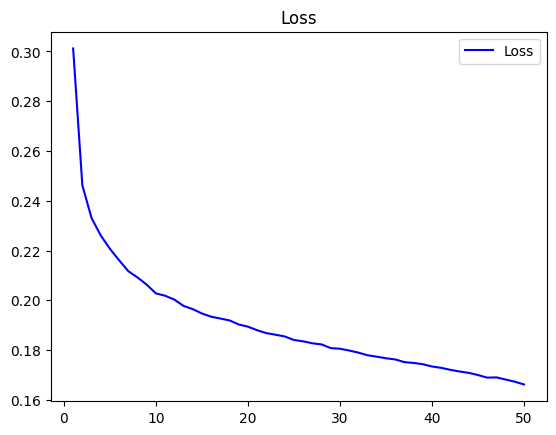

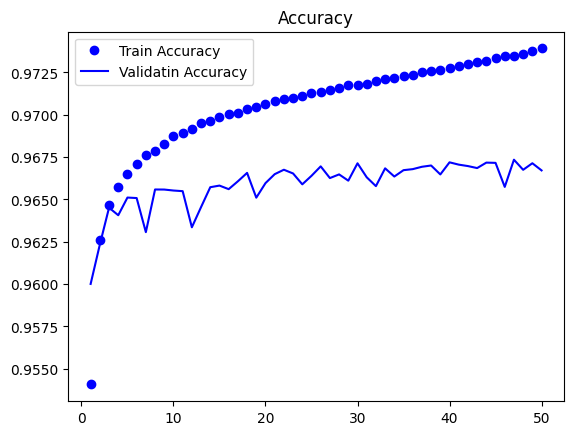

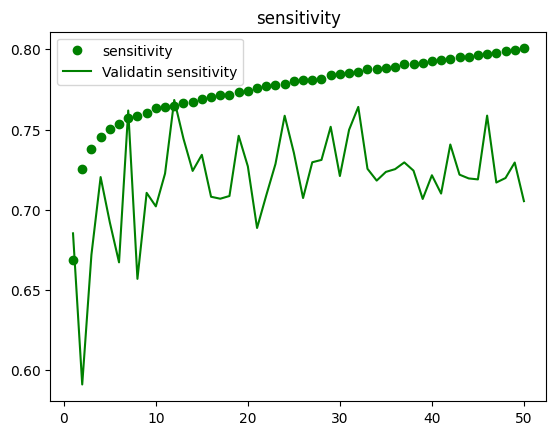

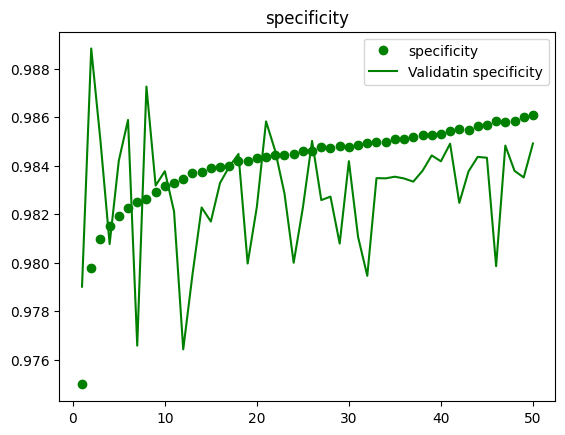

<Figure size 640x480 with 0 Axes>

In [4]:
check_result.plot_history(HISTORY_PATH)

In [5]:
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'f1_score' : metrics.f1_score,
                  'iou' : metrics.iou}

model_param_path = '/visuworks/Blindless_AIFFELTON/Ablation Study/Dense_Unet/model_parameters/dense_unet_50ep_256_fG_wo_slice.tf'

test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0], is_train=False)
test_generator = data_generator.FullSizedDataGenerator(
    TEST_SOURCE,
    batch_size=1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=False,
    augmentation= test_preproc
)

loss, sen, spe, acc, f1, iou = metrics.retrive_all_evaluation_of_test_dataset(test_generator, model_param_path, custom_objects)

1번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2633 - sensitivity: 0.7187 - specificity: 0.9769 - accuracy: 0.9593 - f1_score: 0.6972 - iou: 0.5451
2번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2670 - sensitivity: 0.6316 - specificity: 0.9883 - accuracy: 0.9634 - f1_score: 0.6915 - iou: 0.5368
3번째 epoch 결과


233/233 [==============================] - 27s 111ms/step - loss: 0.2379 - sensitivity: 0.7063 - specificity: 0.9839 - accuracy: 0.9646 - f1_score: 0.7218 - iou: 0.5742
4번째 epoch 결과


233/233 [==============================] - 28s 116ms/step - loss: 0.2334 - sensitivity: 0.7513 - specificity: 0.9790 - accuracy: 0.9633 - f1_score: 0.7275 - iou: 0.5826
5번째 epoch 결과


233/233 [==============================] - 27s 111ms/step - loss: 0.2299 - sensitivity: 0.7281 - specificity: 0.9828 - accuracy: 0.9651 - f1_score: 0.7304 - iou: 0.5855
6번째 epoch 결과


233/233 [==============================] - 27s 112ms/step - loss: 0.2343 - sensitivity: 0.7047 - specificity: 0.9847 - accuracy: 0.9652 - f1_score: 0.7241 - iou: 0.5773
7번째 epoch 결과


233/233 [==============================] - 26s 108ms/step - loss: 0.2340 - sensitivity: 0.7917 - specificity: 0.9737 - accuracy: 0.9613 - f1_score: 0.7288 - iou: 0.5855
8번째 epoch 결과


233/233 [==============================] - 27s 112ms/step - loss: 0.2349 - sensitivity: 0.6888 - specificity: 0.9867 - accuracy: 0.9660 - f1_score: 0.7237 - iou: 0.5769
9번째 epoch 결과


233/233 [==============================] - 26s 108ms/step - loss: 0.2263 - sensitivity: 0.7443 - specificity: 0.9815 - accuracy: 0.9651 - f1_score: 0.7347 - iou: 0.5914
10번째 epoch 결과


233/233 [==============================] - 27s 113ms/step - loss: 0.2269 - sensitivity: 0.7375 - specificity: 0.9821 - accuracy: 0.9651 - f1_score: 0.7332 - iou: 0.5892
11번째 epoch 결과


233/233 [==============================] - 27s 112ms/step - loss: 0.2258 - sensitivity: 0.7558 - specificity: 0.9802 - accuracy: 0.9647 - f1_score: 0.7357 - iou: 0.5933
12번째 epoch 결과


233/233 [==============================] - 27s 111ms/step - loss: 0.2322 - sensitivity: 0.7986 - specificity: 0.9733 - accuracy: 0.9614 - f1_score: 0.7314 - iou: 0.5891
13번째 epoch 결과


233/233 [==============================] - 27s 111ms/step - loss: 0.2283 - sensitivity: 0.7761 - specificity: 0.9771 - accuracy: 0.9633 - f1_score: 0.7344 - iou: 0.5920
14번째 epoch 결과


233/233 [==============================] - 26s 108ms/step - loss: 0.2241 - sensitivity: 0.7579 - specificity: 0.9803 - accuracy: 0.9649 - f1_score: 0.7375 - iou: 0.5955
15번째 epoch 결과


233/233 [==============================] - 27s 113ms/step - loss: 0.2231 - sensitivity: 0.7665 - specificity: 0.9795 - accuracy: 0.9647 - f1_score: 0.7393 - iou: 0.5979
16번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2301 - sensitivity: 0.7380 - specificity: 0.9816 - accuracy: 0.9648 - f1_score: 0.7311 - iou: 0.5874
17번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2263 - sensitivity: 0.7385 - specificity: 0.9822 - accuracy: 0.9654 - f1_score: 0.7347 - iou: 0.5916
18번째 epoch 결과


233/233 [==============================] - 26s 108ms/step - loss: 0.2206 - sensitivity: 0.7412 - specificity: 0.9832 - accuracy: 0.9663 - f1_score: 0.7408 - iou: 0.5990
19번째 epoch 결과


233/233 [==============================] - 26s 109ms/step - loss: 0.2259 - sensitivity: 0.7780 - specificity: 0.9775 - accuracy: 0.9638 - f1_score: 0.7373 - iou: 0.5956
20번째 epoch 결과


233/233 [==============================] - 26s 108ms/step - loss: 0.2250 - sensitivity: 0.7591 - specificity: 0.9802 - accuracy: 0.9649 - f1_score: 0.7377 - iou: 0.5959
21번째 epoch 결과


233/233 [==============================] - 27s 111ms/step - loss: 0.2239 - sensitivity: 0.7238 - specificity: 0.9844 - accuracy: 0.9663 - f1_score: 0.7355 - iou: 0.5923
22번째 epoch 결과


233/233 [==============================] - 27s 112ms/step - loss: 0.2200 - sensitivity: 0.7411 - specificity: 0.9831 - accuracy: 0.9663 - f1_score: 0.7404 - iou: 0.5984
23번째 epoch 결과


233/233 [==============================] - 27s 114ms/step - loss: 0.2191 - sensitivity: 0.7611 - specificity: 0.9809 - accuracy: 0.9657 - f1_score: 0.7425 - iou: 0.6017
24번째 epoch 결과


233/233 [==============================] - 26s 108ms/step - loss: 0.2194 - sensitivity: 0.7867 - specificity: 0.9778 - accuracy: 0.9646 - f1_score: 0.7438 - iou: 0.6040
25번째 epoch 결과


233/233 [==============================] - 28s 115ms/step - loss: 0.2205 - sensitivity: 0.7648 - specificity: 0.9803 - accuracy: 0.9653 - f1_score: 0.7420 - iou: 0.6011
26번째 epoch 결과


233/233 [==============================] - 26s 108ms/step - loss: 0.2178 - sensitivity: 0.7401 - specificity: 0.9837 - accuracy: 0.9667 - f1_score: 0.7429 - iou: 0.6013
27번째 epoch 결과


233/233 [==============================] - 26s 108ms/step - loss: 0.2193 - sensitivity: 0.7632 - specificity: 0.9807 - accuracy: 0.9656 - f1_score: 0.7425 - iou: 0.6015
28번째 epoch 결과


233/233 [==============================] - 26s 109ms/step - loss: 0.2206 - sensitivity: 0.7598 - specificity: 0.9807 - accuracy: 0.9654 - f1_score: 0.7410 - iou: 0.5996
29번째 epoch 결과


233/233 [==============================] - 27s 112ms/step - loss: 0.2201 - sensitivity: 0.7786 - specificity: 0.9786 - accuracy: 0.9647 - f1_score: 0.7425 - iou: 0.6021
30번째 epoch 결과


233/233 [==============================] - 26s 109ms/step - loss: 0.2181 - sensitivity: 0.7504 - specificity: 0.9827 - accuracy: 0.9665 - f1_score: 0.7441 - iou: 0.6034
31번째 epoch 결과


233/233 [==============================] - 27s 111ms/step - loss: 0.2202 - sensitivity: 0.7754 - specificity: 0.9791 - accuracy: 0.9650 - f1_score: 0.7428 - iou: 0.6026
32번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2208 - sensitivity: 0.7916 - specificity: 0.9769 - accuracy: 0.9641 - f1_score: 0.7427 - iou: 0.6029
33번째 epoch 결과


233/233 [==============================] - 27s 113ms/step - loss: 0.2193 - sensitivity: 0.7527 - specificity: 0.9820 - accuracy: 0.9660 - f1_score: 0.7423 - iou: 0.6010
34번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2237 - sensitivity: 0.7465 - specificity: 0.9817 - accuracy: 0.9654 - f1_score: 0.7372 - iou: 0.5947
35번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2205 - sensitivity: 0.7507 - specificity: 0.9819 - accuracy: 0.9658 - f1_score: 0.7407 - iou: 0.5991
36번째 epoch 결과


233/233 [==============================] - 27s 113ms/step - loss: 0.2194 - sensitivity: 0.7559 - specificity: 0.9816 - accuracy: 0.9659 - f1_score: 0.7423 - iou: 0.6011
37번째 epoch 결과


233/233 [==============================] - 26s 108ms/step - loss: 0.2177 - sensitivity: 0.7584 - specificity: 0.9817 - accuracy: 0.9661 - f1_score: 0.7444 - iou: 0.6038
38번째 epoch 결과


233/233 [==============================] - 26s 109ms/step - loss: 0.2182 - sensitivity: 0.7520 - specificity: 0.9822 - accuracy: 0.9662 - f1_score: 0.7433 - iou: 0.6025
39번째 epoch 결과


233/233 [==============================] - 27s 111ms/step - loss: 0.2251 - sensitivity: 0.7386 - specificity: 0.9825 - accuracy: 0.9656 - f1_score: 0.7358 - iou: 0.5927
40번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2188 - sensitivity: 0.7500 - specificity: 0.9825 - accuracy: 0.9663 - f1_score: 0.7432 - iou: 0.6023
41번째 epoch 결과


233/233 [==============================] - 27s 113ms/step - loss: 0.2188 - sensitivity: 0.7407 - specificity: 0.9835 - accuracy: 0.9665 - f1_score: 0.7417 - iou: 0.6001
42번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2198 - sensitivity: 0.7665 - specificity: 0.9804 - accuracy: 0.9656 - f1_score: 0.7437 - iou: 0.6036
43번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2208 - sensitivity: 0.7497 - specificity: 0.9820 - accuracy: 0.9658 - f1_score: 0.7403 - iou: 0.5987
44번째 epoch 결과


233/233 [==============================] - 27s 110ms/step - loss: 0.2175 - sensitivity: 0.7496 - specificity: 0.9828 - accuracy: 0.9665 - f1_score: 0.7438 - iou: 0.6029
45번째 epoch 결과


233/233 [==============================] - 26s 109ms/step - loss: 0.2213 - sensitivity: 0.7468 - specificity: 0.9826 - accuracy: 0.9662 - f1_score: 0.7416 - iou: 0.6004
46번째 epoch 결과


233/233 [==============================] - 26s 108ms/step - loss: 0.2222 - sensitivity: 0.7850 - specificity: 0.9774 - accuracy: 0.9641 - f1_score: 0.7409 - iou: 0.6003
47번째 epoch 결과


233/233 [==============================] - 27s 113ms/step - loss: 0.2177 - sensitivity: 0.7450 - specificity: 0.9832 - accuracy: 0.9665 - f1_score: 0.7435 - iou: 0.6022
48번째 epoch 결과


233/233 [==============================] - 27s 113ms/step - loss: 0.2222 - sensitivity: 0.7480 - specificity: 0.9820 - accuracy: 0.9657 - f1_score: 0.7392 - iou: 0.5972
49번째 epoch 결과


233/233 [==============================] - 27s 112ms/step - loss: 0.2190 - sensitivity: 0.7561 - specificity: 0.9816 - accuracy: 0.9660 - f1_score: 0.7428 - iou: 0.6021
50번째 epoch 결과


233/233 [==============================] - 26s 110ms/step - loss: 0.2228 - sensitivity: 0.7349 - specificity: 0.9832 - accuracy: 0.9659 - f1_score: 0.7370 - iou: 0.5938


In [6]:
import pickle
# Save the metrics as a dictionary
metrics_dict = {
    'loss': loss,
    'sen': sen,
    'spe': spe,
    'acc': acc,
    'f1': f1,
    'iou': iou
}

# Define the file path
file_path = 'dense_unet_50ep_256_fG_wo_slice_metrics_data.pkl'

# Write the metrics to a file using pickle
with open(file_path, 'wb') as f:
    pickle.dump(metrics_dict, f)

In [7]:
file_path = 'dense_unet_50ep_256_fG_wo_slice_metrics_data.pkl'

# Load the metrics from the pickle file
with open(file_path, 'rb') as f:
    metrics_dict = pickle.load(f)

# Access the metrics from the loaded dictionary
loss = metrics_dict['loss']
sen = metrics_dict['sen']
spe = metrics_dict['spe']
acc = metrics_dict['acc']
f1 = metrics_dict['f1']
iou = metrics_dict['iou']

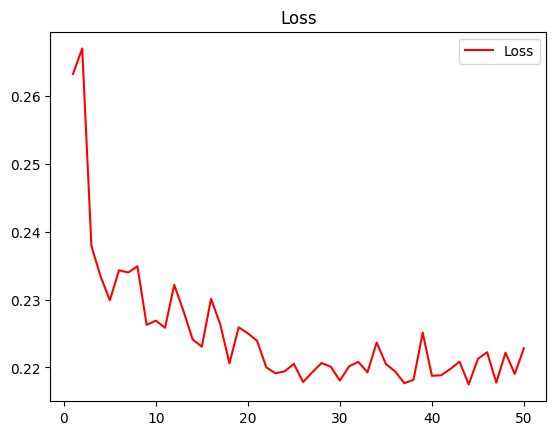

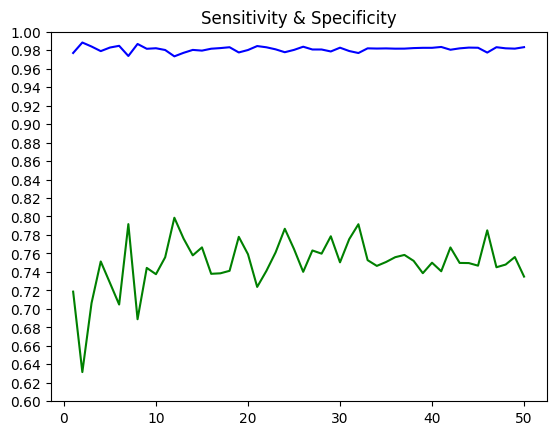

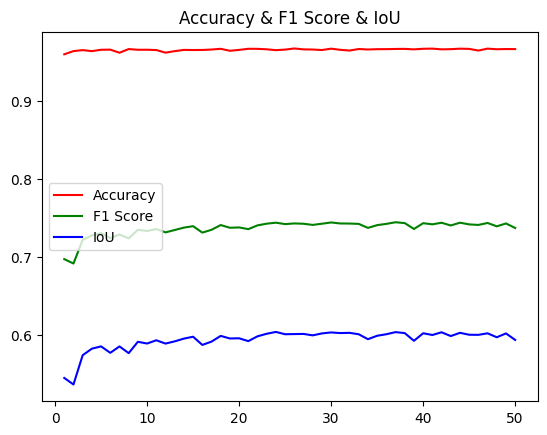

<Figure size 640x480 with 0 Axes>

In [8]:
metrics.plot_test_evaluation_result(loss, sen, spe, acc ,f1, iou)

In [ ]:
# 46번째 epoch 결과
# WARNING:tensorflow:Unable to restore custom metric. Please ensure that the layer implements `get_config` and `from_config` when saving. In addition, please use the `custom_objects` arg when calling `load_model()`.
# WARNING:tensorflow:Unable to restore custom metric. Please ensure that the layer implements `get_config` and `from_config` when saving. In addition, please use the `custom_objects` arg when calling `load_model()`.
# WARNING:tensorflow:Unable to restore custom metric. Please ensure that the layer implements `get_config` and `from_config` when saving. In addition, please use the `custom_objects` arg when calling `load_model()`.
# WARNING:tensorflow:Unable to restore custom metric. Please ensure that the layer implements `get_config` and `from_config` when saving. In addition, please use the `custom_objects` arg when calling `load_model()`.
# 233/233 [==============================] - 26s 108ms/step - loss: 0.2222 - sensitivity: 0.7850 - specificity: 0.9774 - accuracy: 0.9641 - f1_score: 0.7409 - iou: 0.6003